In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class LinearRegression:
    
    def fit(self, X, y, intercept = False):
        
        #recording data and dimensions
        if intercept == False:
            ones = np.ones(len(X)).reshape(len(X), 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        
        #estimate parameters
        XtX = np.dot(self.X.T, self.X)
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)
        
        #make in-sample predictions
        self.y_hat = np.dot(self.X, self.beta_hats)
        
        #calculate loss
        self.L = 0.5*np.sum((self.y - self.y_hat)**2)
    
    def predict(self, X_test, intercept = True):
        
        #form predictions
        self.y_test_hat = np.dot(X_test, self.beta_hats)

In [3]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston['data']
y = boston['target']

In [4]:
model = LinearRegression()
model.fit(X, y, intercept = False)

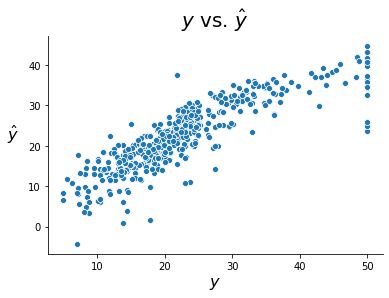

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(model.y, model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()